In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [2]:
data=pd.read_csv("Test/Test_250ws.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,condition,cond_id,length,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,...,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy,hst_mean,hst_variance,hst_skewness,hst_spectral_entropy
0,p010487,3598196_0004,atrial_fibrillation,0,15150,0.830843,0.018406,-0.096802,3.898506,0.751258,...,2.416273,4.706395,0.529588,0.003117,0.951770,4.633750,0.025417,0.004693,7.105961,5.425925
1,p010487,3229491_0002,atrial_fibrillation,0,4083,0.939102,0.012241,-0.646452,2.010406,1.130152,...,0.469035,2.810360,0.982895,0.014282,-0.483582,1.966888,0.111241,0.002510,0.018939,1.154227
2,p000571,3745136_0001,myocardial_infarction,2,23903,0.617067,0.007494,0.035970,4.784851,0.520299,...,-0.280686,5.601584,0.574976,0.002924,-0.812358,4.425927,0.115999,0.002333,0.467026,5.143194
3,p000571,3745136_0002,myocardial_infarction,2,10992,0.559289,0.018571,0.260025,3.780179,0.423082,...,-0.631534,3.820887,0.556823,0.008901,-1.494567,2.974268,0.164730,0.010151,0.883603,3.834744
4,p015963,3645793_0012,atrial_fibrillation,0,1604,0.985690,0.113834,-1.641601,1.895571,1.195143,...,1.609921,1.887201,0.630397,0.031662,1.542105,1.888855,0.170926,0.033357,1.774700,1.900519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,p002280,3740206_0008,congestive_heartfailure,1,167960,0.587458,0.008377,-0.569565,6.180639,0.595856,...,0.162933,6.259561,0.532617,0.011189,-0.774316,5.295300,0.040000,0.001575,0.941771,6.161459
767,p002280,3117261_0001,congestive_heartfailure,1,139419,0.419873,0.021644,-0.723900,4.160331,0.376293,...,-0.178475,4.261658,NaN,NaN,NaN,NaN,0.013616,0.000046,8.942403,8.427219
768,p002280,3869118_0001,congestive_heartfailure,1,104600,0.429449,0.020432,0.658745,2.486099,0.430345,...,1.919181,5.590605,0.552937,0.008381,1.953884,6.215981,0.031575,0.001905,7.727332,7.258813
769,p002280,3869118_0002,congestive_heartfailure,1,61078,0.445606,0.023103,0.555738,2.847662,0.432884,...,0.057145,5.483575,0.494160,0.015562,1.207231,4.835542,0.051653,0.003546,4.396581,5.885888


<h2>Clean dataset<h2>

In [19]:
#Extract metrics
data = data[["cond_id","hst_mean","hst_variance","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

data = data.dropna()
#data = data[ data["hurst"] >= 0.1]
data

,cond_id,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,0,0.025417,0.004693,0.830843,0.018406,-0.096802,3.898506,0.751258,0.042039,0.176091,...,-0.718125,4.500128,0.200692,0.002713,2.416273,4.706395,0.529588,0.003117,0.951770,4.633750
1,0,0.111241,0.002510,0.939102,0.012241,-0.646452,2.010406,1.130152,0.147564,0.400115,...,0.187873,2.255267,0.422639,0.004559,0.469035,2.810360,0.982895,0.014282,-0.483582,1.966888
2,2,0.115999,0.002333,0.617067,0.007494,0.035970,4.784851,0.520299,0.016064,0.231687,...,-0.190498,5.491704,0.294235,0.001459,-0.280686,5.601584,0.574976,0.002924,-0.812358,4.425927
3,2,0.164730,0.010151,0.559289,0.018571,0.260025,3.780179,0.423082,0.022036,0.508721,...,3.060645,4.248924,0.246372,0.003550,-0.631534,3.820887,0.556823,0.008901,-1.494567,2.974268
4,0,0.170926,0.033357,0.985690,0.113834,-1.641601,1.895571,1.195143,0.212753,-1.594053,...,-0.627958,1.744945,0.246936,0.021850,1.609921,1.887201,0.630397,0.031662,1.542105,1.888855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1,0.023585,0.002613,0.504853,0.019945,-0.612323,3.155361,0.437430,0.025887,-0.468744,...,2.238920,4.999254,0.172424,0.016307,-4.791051,5.178843,0.410799,0.026002,0.667171,2.266505
766,1,0.040000,0.001575,0.587458,0.008377,-0.569565,6.180639,0.595856,0.016446,-0.668551,...,0.883794,7.602818,0.211355,0.003611,0.162933,6.259561,0.532617,0.011189,-0.774316,5.295300
768,1,0.031575,0.001905,0.429449,0.020432,0.658745,2.486099,0.430345,0.018321,0.396402,...,1.410638,4.843950,0.224284,0.005506,1.919181,5.590605,0.552937,0.008381,1.953884,6.215981
769,1,0.051653,0.003546,0.445606,0.023103,0.555738,2.847662,0.432884,0.024928,0.317480,...,1.196819,5.610961,0.189988,0.002601,0.057145,5.483575,0.494160,0.015562,1.207231,4.835542


<h2>Define train set and targets<h2>

In [4]:
#Group by pathology
a_f=data[data["cond_id"] ==0]
c_c=data[data["cond_id"] ==1]
m_i=data[data["cond_id"] ==2]

#Extract important metrics
atrial_f = a_f[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
congestive_h = c_c[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
myocardial_i = m_i[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

#Create target array for training
targets=a_f['cond_id'].tolist()+m_i['cond_id'].tolist()+c_c['cond_id'].tolist()

#Create input array for training
X=pd.concat([atrial_f,myocardial_i,congestive_h],ignore_index=True)
X
print(len(a_f))
print(len(c_c))
print(len(m_i))
print(len(a_f)+len(c_c)+len(m_i))

249
221
212
682


<h2>Histograms<h2>

C:\Users\jcruz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


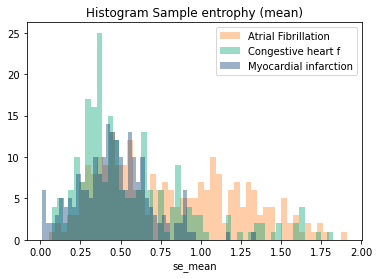

In [156]:
se_af=a_f["se_mean"]
se_cc=c_c["se_mean"]
se_mi=m_i["se_mean"]


sn.distplot(a=se_af,bins=50,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=se_cc,bins=50,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=se_mi,bins=50,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Sample entrophy (mean)")
plt.legend()


(0.0, 0.4)

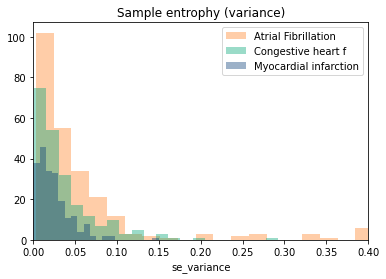

In [9]:
sev_af=a_f["se_variance"]
sev_cc=c_c["se_variance"]
sev_mi=m_i["se_variance"]


sn.distplot(a=sev_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=sev_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=sev_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (variance)")
plt.legend()
plt.xlim(0, 0.4)

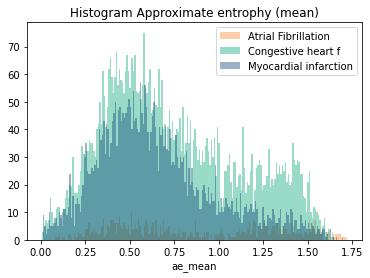

In [300]:
aem_af=a_f["ae_mean"]
aem_cc=c_c["ae_mean"]
aem_mi=m_i["ae_mean"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aem_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aem_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aem_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Approximate entrophy (mean)")
plt.legend()


(0.0, 0.2)

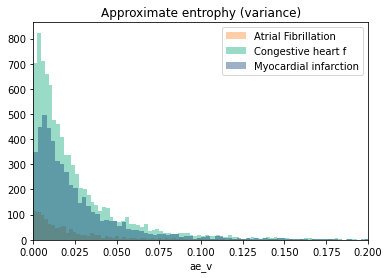

In [93]:
aev_af=a_f["ae_v"]
aev_cc=c_c["ae_v"]
aev_mi=m_i["ae_v"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (variance)")
plt.legend()
plt.xlim(0, 0.2)

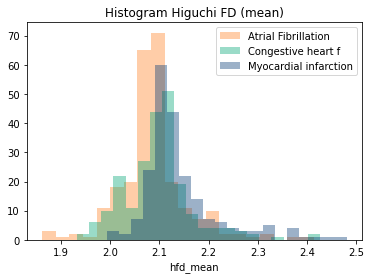

In [10]:
hfd_af=a_f["hfd_mean"]
hfd_cc=c_c["hfd_mean"]
hfd_mi=m_i["hfd_mean"]


sn.distplot(a=hfd_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfd_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfd_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Higuchi FD (mean)")
plt.legend()

(0.0, 0.015)

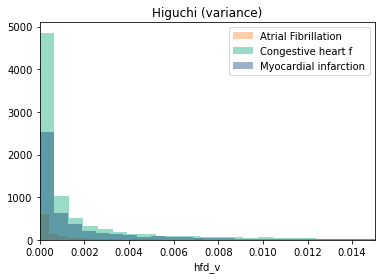

In [95]:
hfdv_af=a_f["hfd_v"]
hfdv_cc=c_c["hfd_v"]
hfdv_mi=m_i["hfd_v"]


sn.distplot(a=hfdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (variance)")
plt.legend()
plt.xlim(0, 0.015)

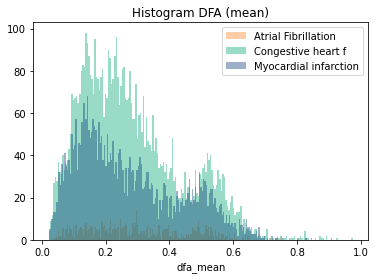

In [302]:
dfa_af=a_f["dfa_mean"]
dfa_cc=c_c["dfa_mean"]
dfa_mi=m_i["dfa_mean"]


sn.distplot(a=dfa_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfa_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfa_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram DFA (mean)")
plt.legend()

(0.0, 0.04)

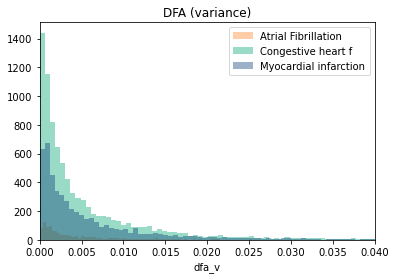

In [96]:
dfav_af=a_f["dfa_v"]
dfav_cc=c_c["dfa_v"]
dfav_mi=m_i["dfa_v"]


sn.distplot(a=dfav_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfav_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfav_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (variance)")
plt.legend()
plt.xlim(0, 0.04)

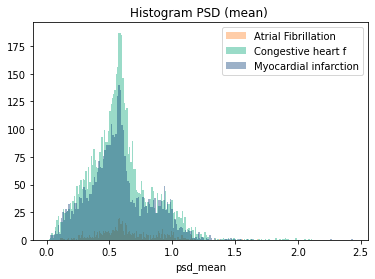

In [304]:
psd_af=a_f["psd_mean"]
psd_cc=c_c["psd_mean"]
psd_mi=m_i["psd_mean"]


sn.distplot(a=psd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram PSD (mean) ")
plt.legend()

(0.0, 0.2)

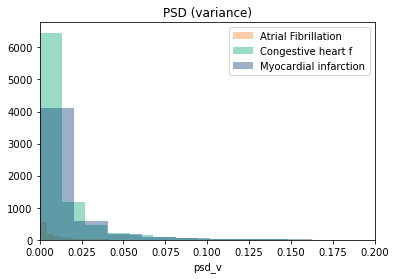

In [90]:
psdv_af=a_f["psd_v"]
psdv_cc=c_c["psd_v"]
psdv_mi=m_i["psd_v"]


sn.distplot(a=psdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (variance)")
plt.legend()
plt.xlim(0, 0.2)

<h2>Scatter plots<h2>

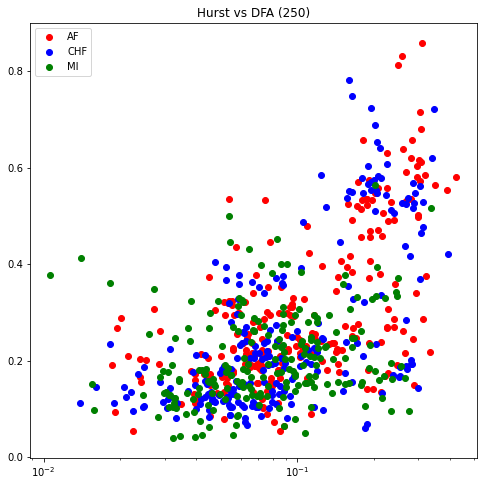

In [5]:
fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["dfa_mean"],color='red')
b=plt.scatter(congestive_h["hst_mean"],congestive_h["dfa_mean"],color='blue')
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["dfa_mean"],color='green')


plt.title("Hurst vs DFA (250)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.savefig(('HurstvsDFA(250).png'))
plt.xscale("log")
plt.show()

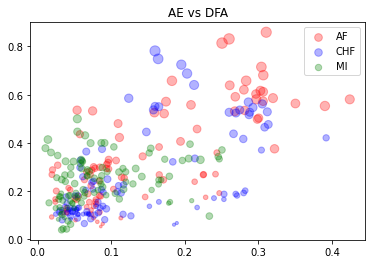

In [41]:
np_pop = np.array(atrial_f["psd_mean"][0:100])*70
np_pop1 = np.array(congestive_h["psd_mean"][0:100])*70
np_pop2 = np.array(myocardial_i["psd_mean"][0:100])*70

a=plt.scatter(atrial_f["hst_mean"][0:100],atrial_f["dfa_mean"][0:100],color='red',alpha=0.3,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"][0:100],congestive_h["dfa_mean"][0:100],color='blue',alpha=0.3,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"][0:100],myocardial_i["dfa_mean"][0:100],color='green',alpha=0.3,s=np_pop2)

plt.title("AE vs DFA")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

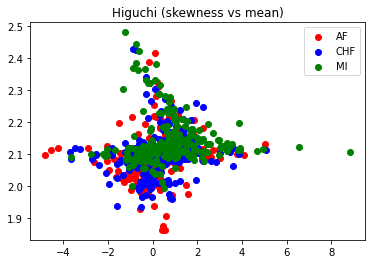

In [7]:
a=plt.scatter(atrial_f["hfd_skewness"],atrial_f["hfd_mean"],color='red')
b=plt.scatter(congestive_h["hfd_skewness"],congestive_h["hfd_mean"],color='blue')
c=plt.scatter(myocardial_i["hfd_skewness"],myocardial_i["hfd_mean"],color='green')

plt.title("Higuchi (skewness vs mean)")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

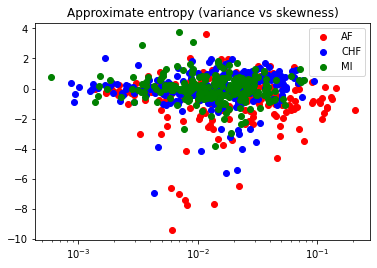

In [8]:
a=plt.scatter(atrial_f["ae_variance"],atrial_f["ae_skewness"],color='red')
b=plt.scatter(congestive_h["ae_variance"],congestive_h["ae_skewness"],color='blue')
c=plt.scatter(myocardial_i["ae_variance"],myocardial_i["ae_skewness"],color='green')

plt.title("Approximate entropy (variance vs skewness)")
plt.axis
plt.xscale("log")
plt.legend((a,b,c),("AF","CHF","MI"))

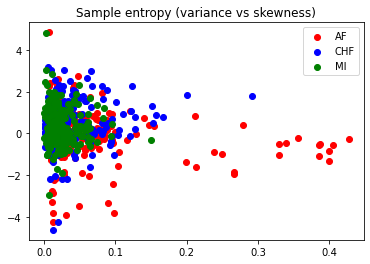

In [200]:
a=plt.scatter(atrial_f["se_variance"],atrial_f["se_skewness"],color='red')
b=plt.scatter(congestive_h["se_variance"],congestive_h["se_skewness"],color='blue')
c=plt.scatter(myocardial_i["se_variance"],myocardial_i["se_skewness"],color='green')

plt.title("Sample entropy (variance vs skewness)")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Train datasets<h2>

In [181]:
#Split data to test and train groups
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

545
545


<h2>Logistic regression <h2>

Accuracy:  0.5401459854014599


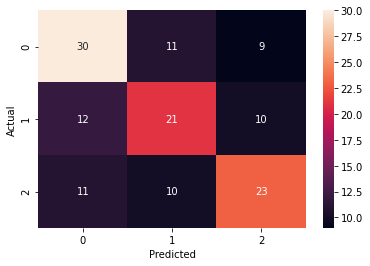

In [182]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

<h2>K nearest neightbors<h2>

In [183]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#Scale train set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

knn.kneighbors_graph()

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.55


<545x545 sparse matrix of type '<class 'numpy.float64'>'
	with 1090 stored elements in Compressed Sparse Row format>

<h2>Gaussian Naive Bayes<h2>

In [167]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Function
gnb = GaussianNB()

#Training
y_pred = gnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 137 points : 75
Accuracy :  0.45255474452554745


<h2>Bernoulli Naive Bayes<h2>

In [168]:
from sklearn.naive_bayes import BernoulliNB

#Bernoulli function
bnb = BernoulliNB()

#Training
y_pred = bnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 137 points : 74
Accuracy :  0.45985401459854014


<h2>Multi-layer Perceptron<h2>

0.48905109489051096


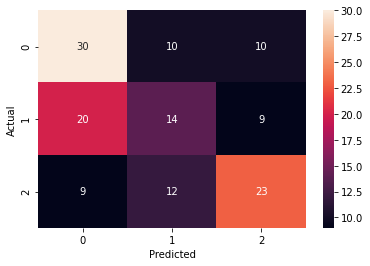

In [169]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Scale training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#Neural Network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=20000)

#Training
clf.fit(X_train, y_train)
X_test = sc.fit_transform(X_test)

#Score
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

#Confussion matrix
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Random forest<h2>


Accuracy :  0.5766423357664233


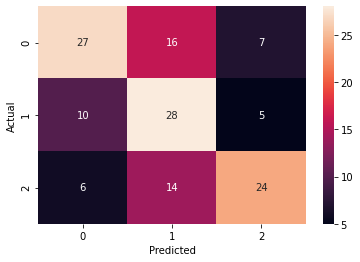

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


classifier = RandomForestClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Extra trees classifier<h2>

Accuracy :  0.6277372262773723


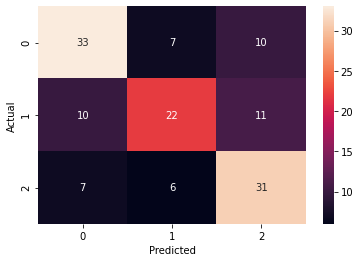

In [188]:
from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

#X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Ada Boost<h2>

Accuracy :  0.5766423357664233


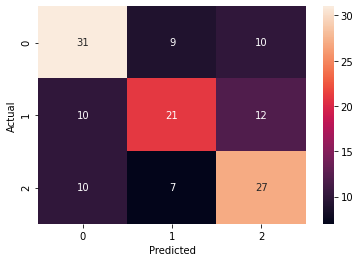

In [172]:
from sklearn.ensemble import AdaBoostClassifier

cassifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Voting Classifier<h2>

In [252]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5) 
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.62 (+/- 0.02) [Ensemble]


In [ ]:
import 